# The SIR Model

The SIR model is a simple epidemiological model, modelling the proportion
of the population in three categories: susceptible $S(t)$, infectious $I(t)$, and removed $R(t)$ (immune, isolated, deceased).

This notebook illustrates how to implement the model in Python.

In [1]:
import numpy as np
from matplotlib.pyplot import plot

First we define the classical fourth order [Runge-Kutta method](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods#The_Runge%E2%80%93Kutta_method). Note that the model function $F$ is not explicitly dependent on $t$, simplifying the implementation slightly. Using a `numpy.array` for the vector `x0` and the return value of `F` allows us to use the standard infix notation in the terms $k_i$.

In [2]:
def rk4(F, x0, h, n):
    '''numerically solve x'(t) = F(x(t), t)'''
    xs = [x0]
    ts = np.arange(n+1)*h

    h2 = h * 0.5
    h6 = h * (1/6)
    for t0 in ts[:-1]:
        k1 = F(x0)
        k2 = F(x0 + h2 * k1)
        k3 = F(x0 + h2 * k2)
        k4 = F(x0 + h * k3)
        x0 = x0 + h6 * (k1 + 2*k2 + 2*k3 + k4)
        xs.append(x0)
    return ts, np.stack(xs)    

The following function `SIR` defines the model function $F = F_{\lambda, \mu}$  closing over the parameters $\lambda$ and $\mu$. The generic variable $x$, used in the `rk4` function above, is interpreted as the vector $(S,I,R)$.

This implements the model

$$\begin{align}
\frac{dS}{dt} &= -\lambda S I\\
\frac{dI}{dt} &= \lambda S I - \mu I\\
\frac{dR}{dt} &= \mu I
\end{align}$$
as $\frac{d}{dt}(S, I, R) = F((S,I,R))$.

In [3]:
def SIR(λ, μ):
    '''build the SIR model with given parameters.
    
       return a function calculating the derivative of the 
       state variables with respect to time.
    '''
    def F(x):
        S,I,R = x
        return np.array([
            -λ*S*I,      # dS/dt
            λ*S*I - μ*I, # dI/dt
            μ*I,         # dR/dt
        ])
    return F

Lets define a small helper function for creating a plot with one call.

In [4]:
def plot_SIR(λ, μ, I0, R0, h=0.1, n=100):
    '''plot the numeric solution of the SIR model 
       with given parameters and initial conditions.
    '''
    x0 = np.array([1-I0-R0, I0, R0])
    return plot(*rk4(SIR(λ, μ), x0, h, n))

Time to make some plots for various parameters and initial conditions

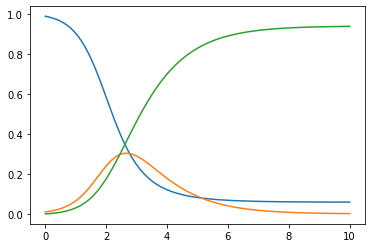

In [5]:
plot_SIR(3, 1, 0.01, 0.00);

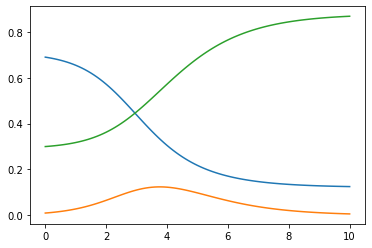

In [6]:
plot_SIR(3, 1, 0.01, 0.30);

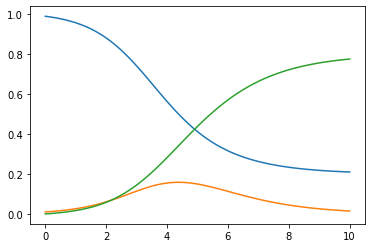

In [7]:
plot_SIR(2, 1, 0.01, 0.00);

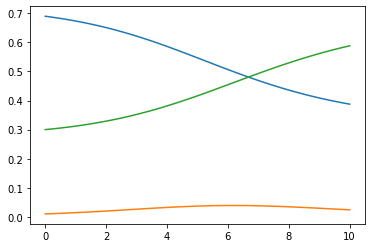

In [8]:
plot_SIR(2, 1, 0.01, 0.30);